In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
factura_final = pd.read_csv("factura_final.csv")

### Realizamos el proceso exploratorio.

Observamos que los margenes comerciales no estan bien calculados y que hay ciertos costes que son iguales a 0.

In [3]:
factura_final

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial
0,1119,Fruta al peso,1.11,1.05,1,0.95,2015-08-16,1.05,0.00,7.0,0.00
1,1035,Cerveza 33cl SKOL,6.00,3.00,2,0.50,2015-08-16,3.00,0.28,1.0,0.40
2,1031,"Cerveza sin 0,0 33cl SAN MIGUEL",1.00,0.70,3,0.70,2015-08-20,1.90,0.40,1.0,0.30
3,1060,"Agua 1,5L BEZOYA",1.00,0.70,3,0.70,2015-08-20,1.90,0.36,1.0,0.30
4,421,Tomate frito 265gr brick ORLANDO,1.00,0.50,3,0.50,2015-08-20,1.90,0.30,7.0,0.20
...,...,...,...,...,...,...,...,...,...,...,...
1243605,7164,Donettes clasicos,1.00,1.99,467110,1.99,2022-11-01,7.84,1.27,7.0,0.23
1243606,1078,Chuches 0.05,2.00,0.10,467111,0.05,2022-11-01,0.10,0.04,7.0,0.01
1243607,1223,Oferta 1€,1.00,1.00,467112,1.00,2022-11-01,4.45,0.80,7.0,0.20
1243608,8689,Palmera bollo,1.00,1.25,467112,1.25,2022-11-01,4.45,0.00,7.0,1.25


Eliminamos las unidades negativas, ya que son todos del mismo ticket y no tendria repercursion en el computo global.


In [3]:
eliminar1 = factura_final.query("Unidades<0").index
eliminar1

Int64Index([694455, 694456, 694457, 694458, 694459, 694460, 694461, 694462,
            694463, 694464],
           dtype='int64')

In [4]:
factura_final.drop(factura_final.index[eliminar1],axis=0,inplace=True)

Eliminamos los tickets enteros (todos los productos) con precios erroneos mayores a 100.

In [5]:
# Vemos que precios son mayores a 100.

factura_final.query("Precio>100")

# Realizamos un bucle para poder encontrar los tickets con precios mayors a 100 y poder eliminarlos. 

for i in factura_final.query("Precio>100")["Num_Factura"]:
    indices_eliminar = (factura_final.query(f"Num_Factura == {i}").index)
    factura_final.drop(indices_eliminar,axis=0,inplace=True)
    
# Aseguramos que ha funcionado el bucle anterior

factura_final.query("Precio>100")    

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial


Eliminamos los tickets enteros (todos los productos) con precios unitarios erroneos mayores a 50.

In [6]:
#Vemos que precios unitarios son mayores a 50.

factura_final.query("Precio_Unit>50")

# Realizamos un bucle para poder encontrar los tickets con precios mayors a 100 y poder eliminarlos. 

for i in factura_final.query("Precio_Unit>50")["Num_Factura"]:
    indices_eliminar = (factura_final.query(f"Num_Factura == {i}").index)
    factura_final.drop(indices_eliminar,axis=0,inplace=True)

# Aseguramos que ha funcionado el bucle anterior

factura_final.query("Precio_Unit>50")   

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial


Creamos una nueva columna de margen por producto ya que la original no esta bien calculada.

In [7]:
factura_final["Margen_Producto"] = (factura_final["Precio_Unit"].values - factura_final["Coste"].values)
factura_final.describe().round(3)

,Codigo,Unidades,Precio,Num_Factura,Precio_Unit,Total,Coste,Seccion,MargenComercial,Margen_Producto
count,1243234.000,1243234.000,1243234.000,1243234.000,1243234.000,1243234.000,1243234.000,1243234.000,1243234.000,1243234.000
mean,2274.341,1.548,1.387,236242.226,1.468,6.990,0.668,5.451,0.353,0.800
std,1951.148,107.069,1.353,132985.123,1.953,212.411,1.087,2.652,0.939,1.978
min,2.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,-490.450,-490.450
25%,1073.000,1.000,0.700,122420.250,0.600,2.300,0.030,3.000,0.030,0.100
50%,1210.000,1.000,1.000,241836.000,1.000,4.500,0.470,7.000,0.250,0.300
75%,3622.000,1.000,1.750,348125.000,1.600,8.350,0.900,7.000,0.490,0.650
max,8713.000,84110.000,84.880,467112.000,48.000,167366.320,500.000,9.000,35.000,48.000


Limpiamos los margenes del producto muy elevados e irreales

In [8]:
factura_final.query("Margen_Producto>10 & Coste!=0")

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial,Margen_Producto
422770,4108,Bony 2 unid,1.0,2.0,166301,12.0,2018-09-23,3.3,0.71,7.0,0.29,11.29


In [9]:
## Cambiamos los precios y precios unitarios de bony
factura_final.loc[422770,"Precio"] = 1.0

In [10]:
factura_final.loc[422770,"Precio_Unit"] = 1.0

In [11]:
factura_final["Margen_Producto"] = (factura_final["Precio_Unit"].values - factura_final["Coste"].values)
factura_final.query("Margen_Producto>10 & Coste!=0")

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial,Margen_Producto


Tratamos los registros con costes mayores a 100

In [12]:
factura_final.query("Coste>100")

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial,Margen_Producto
9356,1420,mikado jazmin jasmines,1.0,0.00,3750,0.00,2015-09-20,3.95,180.0,3.0,-180.00,-180.00
141975,2237,lapillus vino tintq,1.0,9.55,54020,9.55,2016-10-19,15.36,500.0,1.0,-490.45,-490.45


In [13]:
# El de mikado no podemos hacer nada mas que borrarlo, ya que el precio unitario es 0 y no influye en el ticket. Encontramos que se llevaron el mikado gratis.
factura_final.drop([9356],axis=0,inplace=True)

In [14]:
# El coste del vino es erroneo y lo cambiamos por 5.00€
factura_final["Coste"] = factura_final["Coste"].replace({500.0: 5.00})

Observamos y tratamos los margenes negativos (solo los que son son muy grandes)

In [15]:
factura_final["Margen_Producto"] = (factura_final["Precio_Unit"].values - factura_final["Coste"].values)
factura_final.describe().round(3)

,Codigo,Unidades,Precio,Num_Factura,Precio_Unit,Total,Coste,Seccion,MargenComercial,Margen_Producto
count,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000
mean,2274.341,1.548,1.387,236242.413,1.468,6.990,0.668,5.451,0.353,0.800
std,1951.148,107.069,1.353,132985.013,1.953,212.411,0.977,2.652,0.925,1.922
min,2.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,-490.450,-88.020
25%,1073.000,1.000,0.700,122421.000,0.600,2.300,0.030,3.000,0.030,0.100
50%,1210.000,1.000,1.000,241836.000,1.000,4.500,0.470,7.000,0.250,0.300
75%,3622.000,1.000,1.750,348125.000,1.600,8.350,0.900,7.000,0.490,0.650
max,8713.000,84110.000,84.880,467112.000,48.000,167366.320,90.000,9.000,35.000,48.000


In [17]:
## Primero vemos que productos son los que crean margenes negativos muy grandes.
# Son 4 productos: "correction roller", "suavizante 3 Vecinas", "tinto la Casera" y "pipas elefante"
# Vemos que ademas el problema es que el coste esta multiplicado popr 100. Tenemos que dividir entre 100 y se corregirá.

In [16]:
# Dividimos a todos los costes por 100 y tenemos el coste real de esos productos, lo cual modifica el margen del producto

for i in factura_final.query("Margen_Producto>=-88.020 & Margen_Producto<=-8.200")["Coste"]:
    factura_final["Coste"] = factura_final["Coste"].replace(i,i/100)

In [17]:
# Nos aseguramos de que haya funcionado

factura_final.query("Margen_Producto>=-88.020 & Margen_Producto<=-8.200")

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial,Margen_Producto
119,1096,Pipas bolsa 40gr ELEFANTE,1.0,0.3,41,0.3,2015-08-23,9.41,0.085,7.0,0.35,-8.2
536,1096,Pipas bolsa 40gr ELEFANTE,2.0,0.6,220,0.3,2015-08-24,50.01,0.085,7.0,0.35,-8.2
701,1096,Pipas bolsa 40gr ELEFANTE,2.0,0.6,290,0.3,2015-08-24,7.20,0.085,7.0,0.35,-8.2
1015,1096,Pipas bolsa 40gr ELEFANTE,2.0,0.6,439,0.3,2015-08-25,3.34,0.085,7.0,0.35,-8.2
1039,1096,Pipas bolsa 40gr ELEFANTE,8.0,2.4,447,0.3,2015-08-25,5.00,0.085,7.0,0.35,-8.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1220008,2375,tinto verano sin alcohol LA CASERA,1.0,0.9,457721,0.9,2022-09-18,0.90,0.400,7.0,35.00,-39.1
1221517,2375,tinto verano sin alcohol LA CASERA,2.0,1.8,458301,0.9,2022-09-20,1.80,0.400,7.0,35.00,-39.1
1222325,2375,tinto verano sin alcohol LA CASERA,1.0,0.9,458654,0.9,2022-09-22,6.99,0.400,7.0,35.00,-39.1
1236010,2375,tinto verano sin alcohol LA CASERA,2.0,1.8,464049,0.9,2022-10-17,4.10,0.400,7.0,35.00,-39.1


In [18]:
# Como podemos ver, el margen minimo se ha reducido hasta los 7 euros de perdida.

factura_final["Margen_Producto"] = (factura_final["Precio_Unit"].values - factura_final["Coste"].values)
factura_final.describe().round(3)

,Codigo,Unidades,Precio,Num_Factura,Precio_Unit,Total,Coste,Seccion,MargenComercial,Margen_Producto
count,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000,1243233.000
mean,2274.341,1.548,1.387,236242.413,1.468,6.990,0.654,5.451,0.353,0.814
std,1951.148,107.069,1.353,132985.013,1.953,212.411,0.865,2.652,0.925,1.861
min,2.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,-490.450,-7.430
25%,1073.000,1.000,0.700,122421.000,0.600,2.300,0.030,3.000,0.030,0.100
50%,1210.000,1.000,1.000,241836.000,1.000,4.500,0.470,7.000,0.250,0.300
75%,3622.000,1.000,1.750,348125.000,1.600,8.350,0.900,7.000,0.490,0.650
max,8713.000,84110.000,84.880,467112.000,48.000,167366.320,26.000,9.000,35.000,48.000


Nos ponemos ahora con el extremo más alto. Los minimos ya estan mirados, falta ver que pasa con los valores muy grandes

In [21]:
## Habria que eliminar los tickets con mas de 125 euros y el de 118 ya que son erroneos y no hay manera de imputar el total real.
# El total de 105 euros tiene sentido por la compra que es y por el año (2020)

In [19]:
factura_final.query("Total > 100")

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,MargenComercial,Margen_Producto
68294,960,Margarina con sal 250gr TULIPAN,1.00,1.35,26286,1.35,2016-03-22,167366.32,0.81,7.0,0.48,0.54
75505,1038,Missile energi drink 250ml,1.00,1.00,28940,1.00,2016-04-11,167361.99,0.55,1.0,0.45,0.45
118782,1119,Fruta al peso,8.46,8.46,45000,1.00,2016-08-15,120.40,0.00,7.0,0.00,1.00
118783,1119,Fruta al peso,1.80,1.80,45000,1.00,2016-08-15,120.40,0.00,7.0,0.00,1.00
118784,1119,Fruta al peso,2.30,2.30,45000,1.00,2016-08-15,120.40,0.00,7.0,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
822592,1119,Fruta al peso,0.56,3.08,308792,5.50,2020-09-11,115.11,0.00,7.0,0.00,5.50
822593,5273,Pan de 0.90cent,1.00,0.90,308792,0.90,2020-09-11,115.11,0.00,8.0,0.90,0.90
822594,589,Cafe molido 250gr SANTA CRISTINA,2.00,3.90,308792,1.95,2020-09-11,115.11,1.88,7.0,0.35,0.07
822595,1787,chocolate con leche nestle extrafino,1.00,1.50,308792,1.50,2020-09-11,115.11,0.88,7.0,0.74,0.62


In [20]:
# Borramos primero el ticket con un total de 118, asi despues borramos todos los superiores a 200€.

factura_final.drop(factura_final.query("Total == 118.91").index,axis=0,inplace=True)

In [21]:
# En esta celda borramos todos los registros con totales mayores a 200.

for i in factura_final.query("Total>100")["Total"]:
    indices_eliminar = (factura_final.query("Total > 200").index)
    factura_final.drop(indices_eliminar,axis=0,inplace=True)

In [22]:
factura_final.query("Total > 100").Total.value_counts()

173.69    57
172.51    53
160.40    48
136.19    43
114.50    42
129.46    41
146.90    40
115.11    28
104.54    27
120.40    12
Name: Total, dtype: int64

In [23]:
# Comprobamos la modificacion anterior en el margen por producto.

factura_final["Margen_Producto"] = (factura_final["Precio_Unit"].values - factura_final["Coste"].values)
factura_final.describe().round(3)

,Codigo,Unidades,Precio,Num_Factura,Precio_Unit,Total,Coste,Seccion,MargenComercial,Margen_Producto
count,1243224.000,1243224.000,1243224.000,1243224.000,1243224.000,1243224.000,1243224.000,1243224.000,1243224.000,1243224.000
mean,2274.349,1.548,1.387,236243.537,1.468,6.720,0.654,5.451,0.353,0.814
std,1951.153,107.069,1.353,132984.810,1.953,7.793,0.865,2.652,0.925,1.861
min,2.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,-490.450,-7.430
25%,1073.000,1.000,0.700,122422.750,0.600,2.300,0.030,3.000,0.030,0.100
50%,1210.000,1.000,1.000,241838.500,1.000,4.500,0.470,7.000,0.250,0.300
75%,3623.000,1.000,1.750,348125.000,1.600,8.350,0.900,7.000,0.490,0.650
max,8713.000,84110.000,84.880,467112.000,48.000,173.690,26.000,9.000,35.000,48.000


Eliminamos la columna de margen comercial que venia por defecto ya que no es correcta.

In [24]:
factura_final.drop(["MargenComercial"],axis=1,inplace=True)

Creo una columna de margen porcentual por Producto.

In [25]:
factura_final["%_Margen_Producto"] = ((factura_final["Precio_Unit"].values-factura_final["Coste"].values)/factura_final["Precio_Unit"].values).round(2)
factura_final

C:\Users\oliva\AppData\Local\Temp\ipykernel_5052\387589782.py:1: RuntimeWarning: divide by zero encountered in divide
  factura_final["%_Margen_Producto"] = ((factura_final["Precio_Unit"].values-factura_final["Coste"].values)/factura_final["Precio_Unit"].values).round(2)


,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
0,1119,Fruta al peso,1.11,1.05,1,0.95,2015-08-16,1.05,0.00,7.0,0.95,1.00
1,1035,Cerveza 33cl SKOL,6.00,3.00,2,0.50,2015-08-16,3.00,0.28,1.0,0.22,0.44
2,1031,"Cerveza sin 0,0 33cl SAN MIGUEL",1.00,0.70,3,0.70,2015-08-20,1.90,0.40,1.0,0.30,0.43
3,1060,"Agua 1,5L BEZOYA",1.00,0.70,3,0.70,2015-08-20,1.90,0.36,1.0,0.34,0.49
4,421,Tomate frito 265gr brick ORLANDO,1.00,0.50,3,0.50,2015-08-20,1.90,0.30,7.0,0.20,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...
1243605,7164,Donettes clasicos,1.00,1.99,467110,1.99,2022-11-01,7.84,1.27,7.0,0.72,0.36
1243606,1078,Chuches 0.05,2.00,0.10,467111,0.05,2022-11-01,0.10,0.04,7.0,0.01,0.20
1243607,1223,Oferta 1€,1.00,1.00,467112,1.00,2022-11-01,4.45,0.80,7.0,0.20,0.20
1243608,8689,Palmera bollo,1.00,1.25,467112,1.25,2022-11-01,4.45,0.00,7.0,1.25,1.00


Nos damos cuenta de que hay 152 registros con precio, precio unitario, coste y margen = 0, por lo que eliminamos todos estos registros con sus tickets asociados

In [29]:
#Vemos que precios unitarios son iguales a 0.

factura_final.query("Precio_Unit==0")

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
992,1120,Embutido al corte,3.000,0.0,424,0.0,2015-08-25,0.00,0.0,7.0,0.0,NaN
1623,1119,Fruta al peso,0.000,0.0,700,0.0,2015-08-27,7.33,0.0,7.0,0.0,NaN
2966,1119,Fruta al peso,0.400,0.0,1273,0.0,2015-08-31,0.00,0.0,7.0,0.0,NaN
3750,1119,Fruta al peso,0.220,0.0,1591,0.0,2015-09-02,3.39,0.0,7.0,0.0,NaN
3798,1119,Fruta al peso,0.000,0.0,1604,0.0,2015-09-03,4.45,0.0,7.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1169593,1119,Fruta al peso,0.070,0.0,437964,0.0,2022-06-19,4.46,0.0,7.0,0.0,NaN
1230067,1119,Fruta al peso,0.445,0.0,461788,0.0,2022-10-07,4.65,0.0,7.0,0.0,NaN
1230933,1119,Fruta al peso,0.405,0.0,462116,0.0,2022-10-09,5.74,0.0,7.0,0.0,NaN
1241946,1119,Fruta al peso,0.620,0.0,466533,0.0,2022-10-30,16.10,0.0,7.0,0.0,NaN


In [26]:
# Realizamos un bucle para poder encontrar los tickets con precios_unit = 0 y poder eliminarlos. 

for i in factura_final.query("Precio_Unit==0")["Num_Factura"]:
    indices_eliminar = (factura_final.query(f"Num_Factura == {i}").index)
    factura_final.drop(indices_eliminar,axis=0,inplace=True)

# Aseguramos que ha funcionado el bucle anterior

factura_final.query("Precio_Unit == 0")  

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto


Ahora nos toca ver que hacemos con los elementos con coste igual a 0 e inferiores a 0,01 que obsemos que es debido a indicar mal el coste. Lo cual lo realizaremos en dos notebooks nuevos, para poder hacer dos opciones, imputar la media/mediana en el coste/margen, y poner los margenes a 0 para no darle importancia en el ticket y con ello en los beneficios.

# PRODUCTOS VENDIDOS A PERDIDAS

#### Aqui tenemos todos los productos con margenes negativos, es decir, productos que se vendian mas baratos de lo que se compraban. Perdidas. Hacer pequeño estudio de todos ellos.

In [27]:
productos_margen_negativo = factura_final.query("Margen_Producto>-7.430 & Margen_Producto<=0")
productos_margen_negativo

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
52,589,Cafe molido 250gr SANTA CRISTINA,1.0,1.85,20,1.85,2015-08-21,3.85,1.88,7.0,-0.03,-0.02
58,589,Cafe molido 250gr SANTA CRISTINA,1.0,1.85,22,1.85,2015-08-21,1.85,1.88,7.0,-0.03,-0.02
90,588,Cafe natural 275gr SAIMAZA,1.0,1.85,35,1.85,2015-08-23,3.35,2.10,7.0,-0.25,-0.14
111,1201,Chicles 14.5g 2x1€ TRIDENT,2.0,1.00,40,0.50,2015-08-23,1.00,0.80,7.0,-0.30,-0.60
118,1106,"Patatas a 0,30 RISI",1.0,0.30,41,0.30,2015-08-23,9.41,0.34,7.0,-0.04,-0.13
...,...,...,...,...,...,...,...,...,...,...,...,...
1235174,7282,Caña de lomo,1.0,1.00,463746,1.00,2022-10-16,6.50,1.00,7.0,0.00,0.00
1238868,7282,Caña de lomo,1.0,1.00,465259,1.00,2022-10-23,11.25,1.00,7.0,0.00,0.00
1239525,7282,Caña de lomo,1.0,1.00,465493,1.00,2022-10-24,2.00,1.00,7.0,0.00,0.00
1239709,7282,Caña de lomo,3.0,3.00,465578,1.00,2022-10-25,8.61,1.00,7.0,0.00,0.00


C:\Users\oliva\AppData\Local\Temp\ipykernel_5052\71301274.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(productos_margen_negativo["Margen_Producto"], axlabel="Margen", color="green")


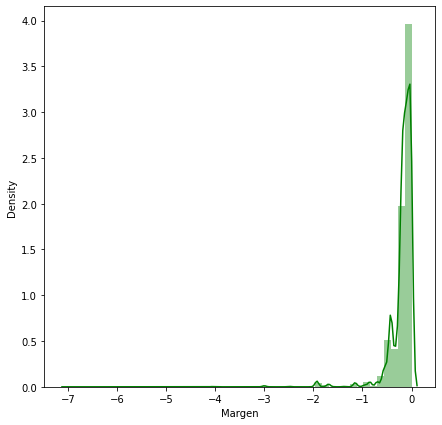

In [28]:
plt.figure(figsize=(7,7))
sns.distplot(productos_margen_negativo["Margen_Producto"], axlabel="Margen", color="green") 
plt.show()

In [29]:
lista_productos_margen_negativo = factura_final.query("Margen_Producto>-7.430 & Margen_Producto<=0")["Producto"].unique()
lista_productos_margen_negativo

array(['Cafe molido 250gr SANTA CRISTINA', 'Cafe natural 275gr SAIMAZA',
       'Chicles 14.5g 2x1€ TRIDENT', 'Patatas a 0,30 RISI',
       'Zumo piña pack 4 DON SIMON',
       'Nata montada azucarada 250gr spray ASTURIANA',
       'Aceitunas Banderillas BRAVO', 'Zumo naranja pack 4 SIMON LIFE',
       'Zumo tropical pack 6 DON SIMON', 'Palomitas maiz caja 3u popitas',
       'Tortas algarrobo 250gr ', 'Mantequilla con sal 250gr ASTURIANA',
       'Salmon Ahumado 100gr LA MAR DE TAPAS',
       'Zumo mandarina pack 4 SIMON LIFE',
       'Aceite de oliva suave 1L MINERVA', 'Garbanza AXARQUIA',
       'Aceituna de la abuela 1,35kg CHICON',
       'Trancetto cacao 10u BALCONI',
       'Helado barra turron 1000ml SOMOSIERRA',
       'Harina fritos y rebozados GALLO', 'King choco chocolate MIKADO',
       'Harina de reposteria GALLO',
       'Aceitunas manzanilla deshusada 1,2kg BRAVO',
       'Pan maxi burger 4u 300gr BIMBO',
       'Potitos Guisante y jamon Baby Noches HERO',
       'Pate 

In [30]:
productos_margen_negativo.groupby("Producto").sum().sort_values(by="Margen_Producto").head(7)

C:\Users\oliva\AppData\Local\Temp\ipykernel_5052\2153963954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  productos_margen_negativo.groupby("Producto").sum().sort_values(by="Margen_Producto").head(7)


,Codigo,Unidades,Precio,Num_Factura,Precio_Unit,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
Producto,,,,,,,,,,
Donuts Blanco Oferta Pack 4,6306746,1741.0,2879.75,409673873,2827.21,12345.90,3302.23,11977.0,-475.02,-307.40
Pan Bimbo grande,8461810,1763.0,1763.00,488383102,1715.00,13628.66,2023.70,12005.0,-308.70,-308.70
Margarina zas 1kg,725028,127.0,553.70,41841153,540.15,1731.64,760.12,868.0,-219.97,-51.67
aspitos ASPIL,1089066,902.0,90.20,50408424,31.90,1477.40,159.50,2233.0,-127.60,-1276.00
Mantequilla con sal 250gr ASTURIANA,238108,247.0,519.15,48279771,519.15,2161.23,632.32,1729.0,-113.17,-55.78
aceite girasol koipe,751275,110.0,247.90,39315982,233.95,853.81,346.50,210.0,-112.55,-50.71
Detergente liquido jabon marsella,360148,183.0,556.70,29737300,545.50,1944.45,653.35,537.0,-107.85,-36.46


In [35]:
productos_margen_negativo.query("Producto == 'Donuts Blanco Oferta Pack 4'")
plt.figure(figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [36]:
productos_margen_negativo.groupby("Producto").sum().sort_values(by="Unidades").tail(7)

,Codigo,Unidades,Precio,Num_Factura,Precio_Unit,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
Producto,,,,,,,,,,
donut bombon 2und,2508080,550.0,555.90,152006795,540.60,2374.26,593.85,3745.0,-53.25,-53.25
Mayonesa suave 400ml PRIMA,274804,670.0,1206.00,148981275,1200.60,4891.73,1220.61,4669.0,-20.01,-13.34
Pan maxi burger 4u 300gr BIMBO,593050,745.0,1269.95,181658740,1235.75,3869.35,1297.75,5075.0,-62.00,-37.20
donuts glacé 2und,3760578,814.0,822.70,225386490,810.60,3746.94,890.22,5614.0,-79.62,-79.62
aspitos ASPIL,1089066,902.0,90.20,50408424,31.90,1477.40,159.50,2233.0,-127.60,-1276.00
Donuts Blanco Oferta Pack 4,6306746,1741.0,2879.75,409673873,2827.21,12345.90,3302.23,11977.0,-475.02,-307.40
Pan Bimbo grande,8461810,1763.0,1763.00,488383102,1715.00,13628.66,2023.70,12005.0,-308.70,-308.70


## Guardamos el nuevo CSV ya preprocesado

In [32]:
factura_final.to_csv('factura_final2.csv',index=False)